In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('stylesheet.mplstyle')

# Set color variables to make colors easier later
lightblue = '#54d2d2'
yellow = '#ffcb00'
orange = '#f8aa4b'
pink = '#ff6150'
gray = '#a89cac'
wrblue = '#0197F6'

# define some dictionaries to make it easy to loop over metallicities
cc = {'Z014': pink,
      'Z006': orange,
      'Z002': yellow,
      'Z0002': lightblue}

ldict = {'Z014': 'Z = 0.014',
         'Z006': 'Z = 0.006',
         'Z002': 'Z = 0.002',
         'Z0002': 'Z = 0.0002'}

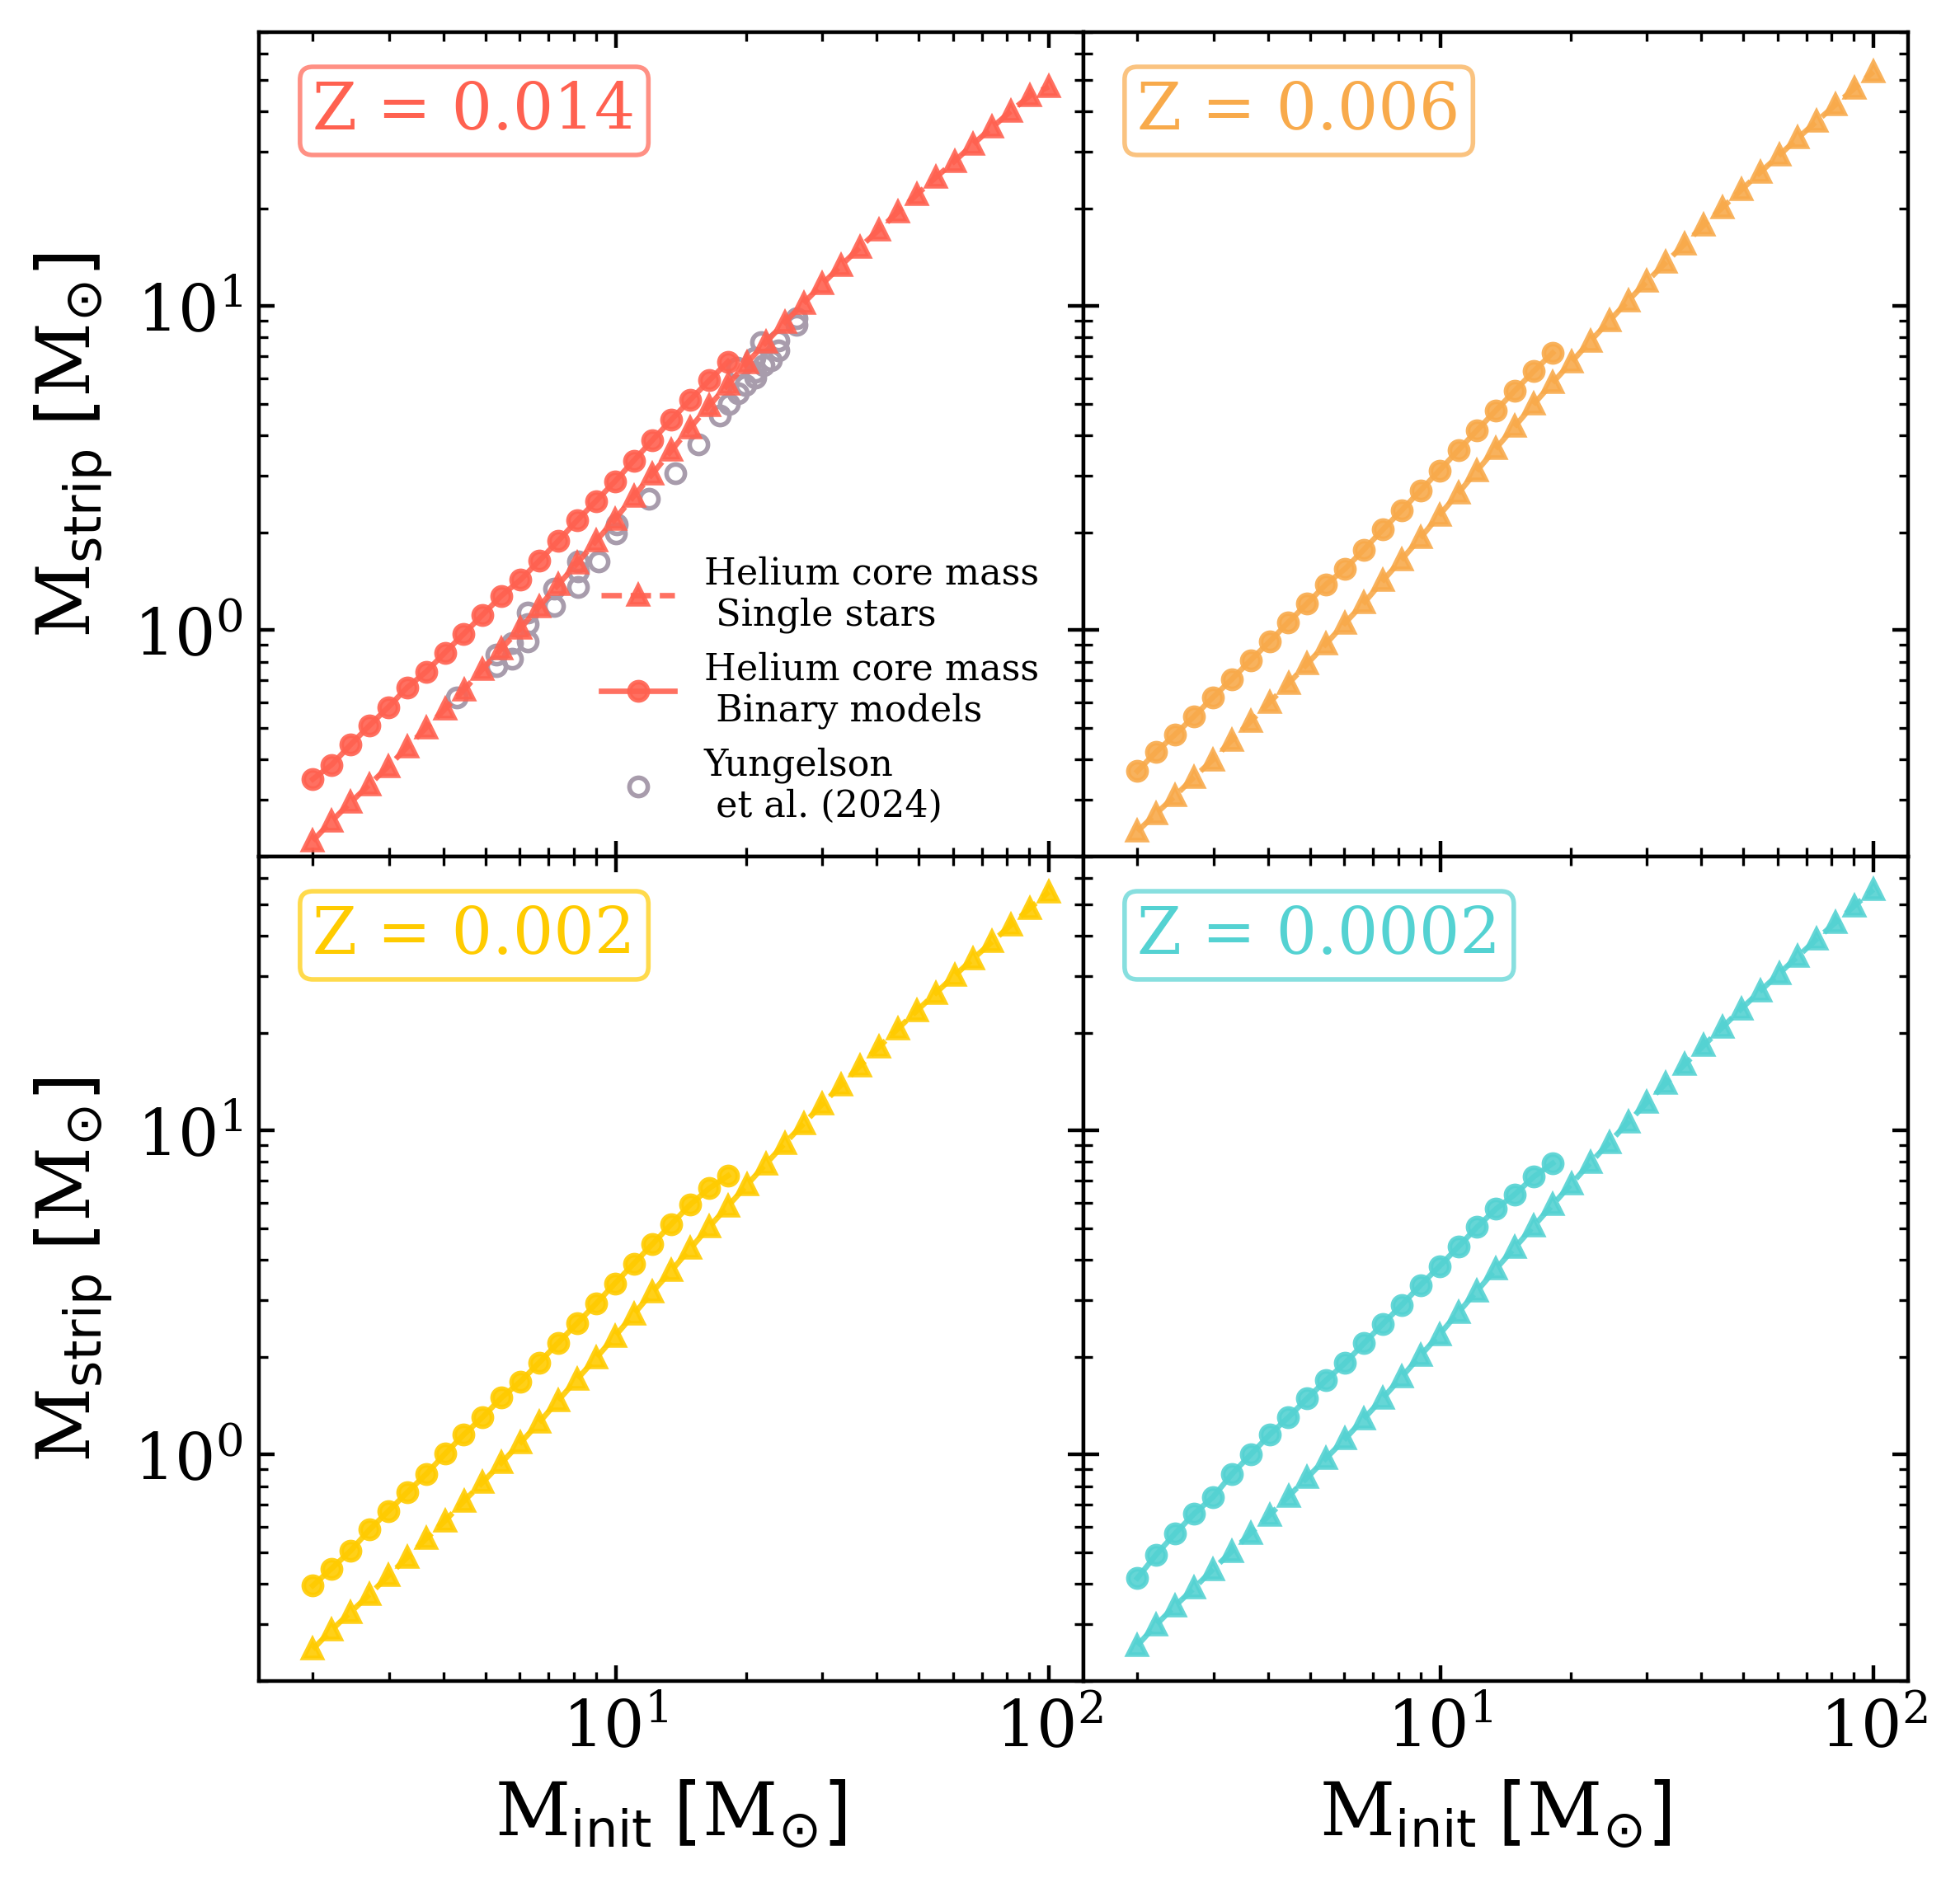

In [4]:
m_single = np.loadtxt('../data/minit_mstrip/minit_mstrip_single.txt', delimiter=',')
m_binary = np.loadtxt('../data/minit_mstrip/minit_mstrip_binary.txt', delimiter=',')

fig, ax = plt.subplots(2, 2, dpi=400, figsize=(5, 5))
fig.subplots_adjust(0, 0, 1, 1, 0, 0)

for l, env in enumerate(cc.keys()):
    i = int(np.floor(l/2))
    j = l%2

    ax[i][j].plot(m_single[:,0], m_single[:,1+l], '^', c=cc[env], ms=4, ls='--', lw=1.2, alpha=0.9, label='Helium core mass \n Single stars')
    ax[i][j].plot(m_binary[:,0], m_binary[:,1+l], 'o', c=cc[env], ms=4, ls='-', lw=1.2, alpha=0.9, label='Helium core mass \n Binary models')
    
    ax[i][j].text(2, 50, ldict[env], color=cc[env], ha='left', va='top',
           bbox=dict(facecolor='w', alpha=0.7, edgecolor=cc[env], boxstyle='round,pad=0.2'))

    # Axis formatting
    ax[i][j].set_xscale('log')
    ax[i][j].set_yscale('log')
    ax[i][j].set_xlim(1.5, 120)
    ax[i][j].set_ylim(0.2, 70)
    ax[i][j].tick_params(direction='in', which='both')
    ax[i][j].xaxis.set_ticks_position('both')
    ax[i][j].yaxis.set_ticks_position('both')
    # ax[i][j].grid(ls=':')
    if i==0:
        ax[i][j].set_xticklabels([])
    else:
        ax[i][j].set_xlabel('M$_{\\mathrm{init}} \\; [$M$_{\\odot}]$')
    if j==0:
        ax[i][j].set_ylabel('M$_{\\mathrm{strip}} \\; [$M$_{\\odot}]$')
    else:
        ax[i][j].set_yticklabels([])

# just for the Z=0.014 distribution
Y24 = np.loadtxt('../data/minit_mstrip/yungelson_minit_mstrip.txt', delimiter=',')
ax[0][0].plot(Y24[:,0], Y24[:,1], 'o', ms=4, color='None', markeredgecolor=gray, zorder=0, label='Yungelson\n et al. (2024)')
ax[0][0].legend(loc=4, fontsize=8, frameon=False)

# plt.show()
plt.savefig('Minit_Mstrip.png', bbox_inches='tight')